Zomato Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


step 2 - Create data frame 

In [ ]:
data_frame=pd.read_csv("C:\\Users\\komal\\OneDrive\\Desktop\\zomato\\Zomato data .csv")

In [ ]:
data_frame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


convert the data type cloumn rate

In [ ]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

data_frame['rate']=data_frame['rate'].apply(handleRate)    

In [ ]:
data_frame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Type of resturant

Text(0.5, 0, 'type of resturant')

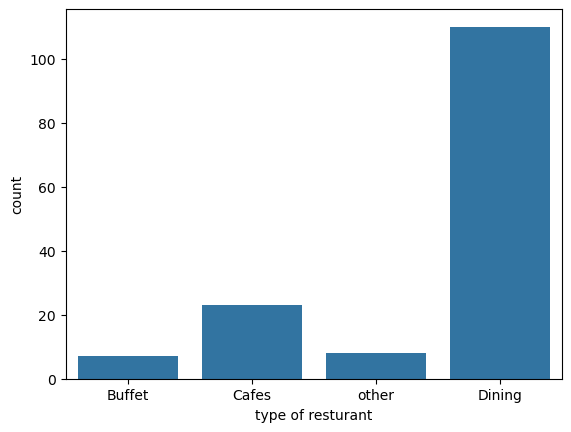

In [ ]:
sns.countplot(x=data_frame['listed_in(type)'])
plt.xlabel("type of resturant")


In [ ]:
data_frame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes ')

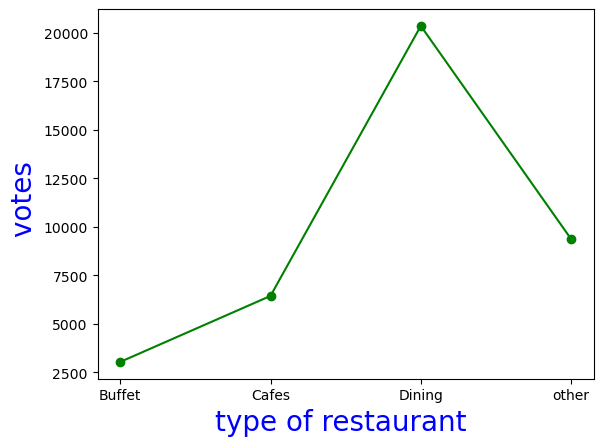

In [ ]:
grouped_data=data_frame.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel("type of restaurant ",c='blue',size=20)
plt.ylabel("votes ",c='blue',size=20)

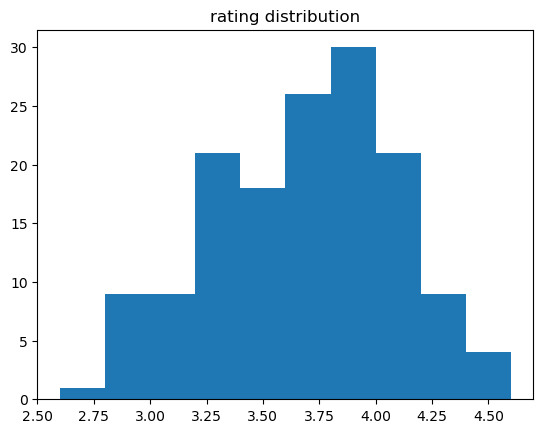

In [ ]:
plt.hist(data_frame['rate'],bins=10)
plt.title("rating distribution")
plt.show()

majority resturant received rating 3.5 t0 4.1

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

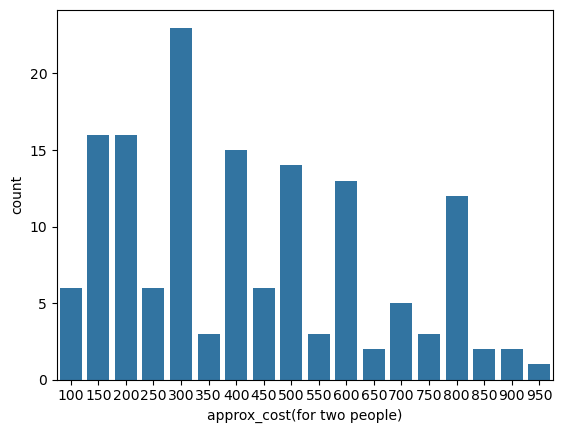

In [ ]:
couple_data=data_frame['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion = The majority of couples prefer resturants  with an approx cost of 300 ruppes

which mode receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

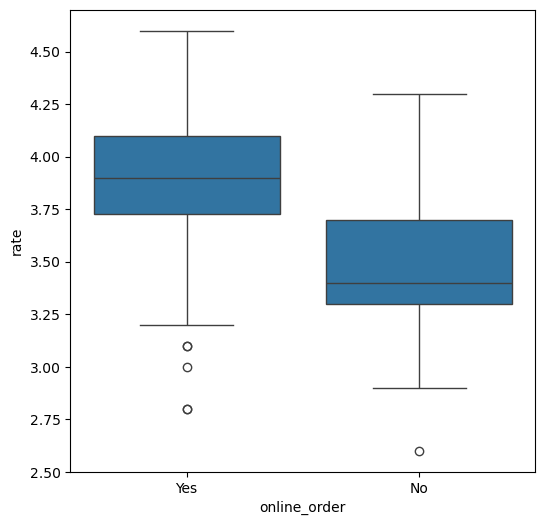

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data_frame)

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='online_order', data=data_frame)
plt.show()

offline rating is lower 

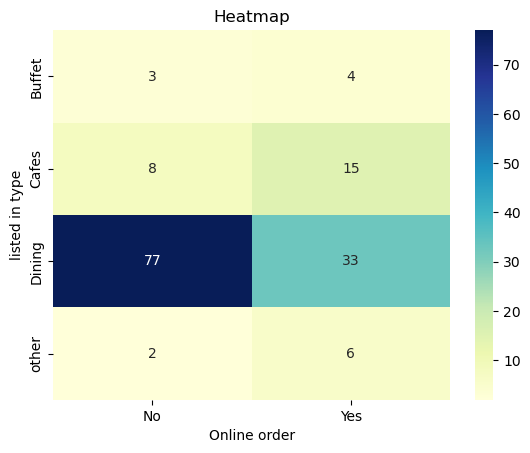

In [ ]:
pivote_table=data_frame.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivote_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel('Online order')
plt.ylabel('listed in type')
plt.show()